In [1]:
import numpy as np
import pandas as pd

In [2]:
abalone = pd.read_csv("abalone.csv")

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Ask Six Questions Before moving forward

In [4]:
abalone.shape

(4177, 9)

In [5]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
abalone.duplicated().sum()

np.int64(0)

In [8]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Encoding

In [9]:
abalone['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [10]:
abalone['Sex'] = abalone['Sex'].map({"M":0,"F":1,"I":2})

In [11]:
abalone['Sex'].value_counts()

Sex
0    1528
2    1342
1    1307
Name: count, dtype: int64

# EDA ( Exploratory data Analysis)

In [12]:
corr = abalone.corr()

<Axes: >

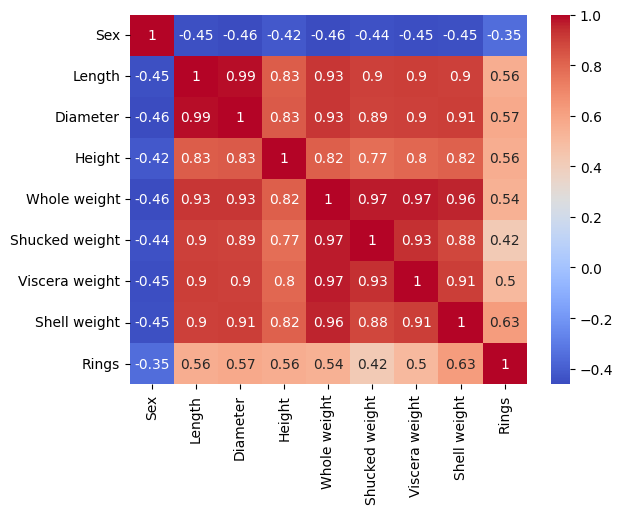

In [13]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

# Distribution of target variable (age)

<Axes: xlabel='Rings', ylabel='Count'>

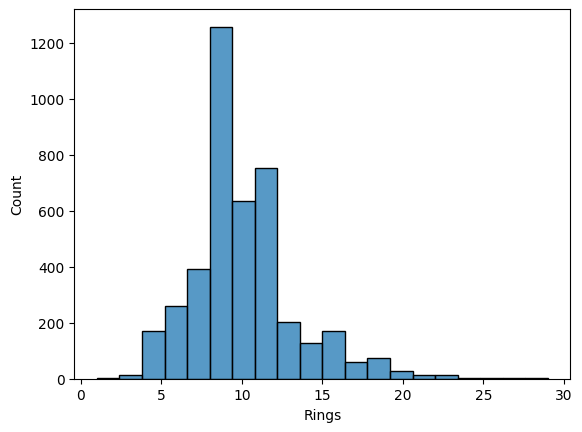

In [14]:
sns.histplot(abalone['Rings'],bins=20)

In [15]:
abalone['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64

# Scatter plot of length vs age

<Axes: xlabel='Length', ylabel='Rings'>

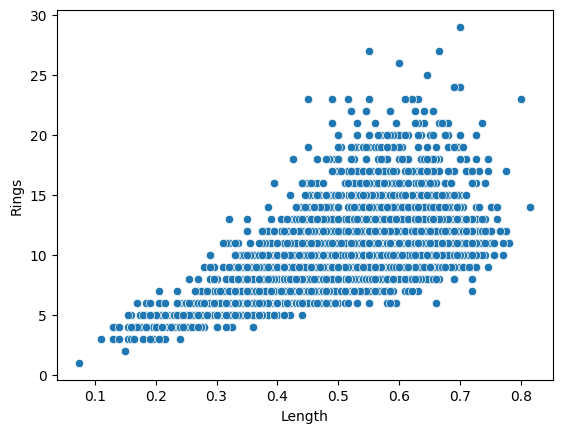

In [16]:
sns.scatterplot(x='Length',y='Rings',data=abalone)

# Train Test Split

In [17]:
X = abalone.drop('Rings',axis=1)
y = abalone['Rings']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarization the data

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [21]:
X_test_scaled

array([[-1.15518338,  0.67189513,  0.47107108, ...,  0.27104784,
         1.10272193,  0.60976664],
       [-1.15518338,  0.54597132,  0.31905249, ...,  0.11857068,
         0.31224199,  0.03801081],
       [ 0.05278772,  0.29412372,  0.36972535, ..., -0.24916836,
         0.39905771,  0.68123611],
       ...,
       [ 1.26075882,  0.16819992,  0.21770676, ..., -0.03614879,
        -0.20865231, -0.22642626],
       [ 1.26075882, -0.50339368, -0.5423862 , ..., -0.47339947,
        -0.81636232, -0.39795301],
       [ 1.26075882, -1.34288568, -1.35315201, ..., -1.17748518,
        -1.30984112, -1.17697032]], shape=(836, 8))

In [22]:
X_test_scaled

array([[-1.15518338,  0.67189513,  0.47107108, ...,  0.27104784,
         1.10272193,  0.60976664],
       [-1.15518338,  0.54597132,  0.31905249, ...,  0.11857068,
         0.31224199,  0.03801081],
       [ 0.05278772,  0.29412372,  0.36972535, ..., -0.24916836,
         0.39905771,  0.68123611],
       ...,
       [ 1.26075882,  0.16819992,  0.21770676, ..., -0.03614879,
        -0.20865231, -0.22642626],
       [ 1.26075882, -0.50339368, -0.5423862 , ..., -0.47339947,
        -0.81636232, -0.39795301],
       [ 1.26075882, -1.34288568, -1.35315201, ..., -1.17748518,
        -1.30984112, -1.17697032]], shape=(836, 8))

# Training Models

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Define a list of models to train and compare
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: MSE = {mse:.2f}, R2 = {r2:.2f}')

Linear Regression: MSE = 4.95, R2 = 0.54
Ridge Regression: MSE = 4.99, R2 = 0.54
Lasso Regression: MSE = 10.83, R2 = -0.00
Decision Tree: MSE = 9.02, R2 = 0.17
Random Forest: MSE = 5.07, R2 = 0.53


In [25]:
# The MSE represents the average squared difference between the predicted and actual values, and a lower MSE indicates better performance.
# The R2 score represents the proportion of variance in the target variable that is predictable from the independent variables, and a higher R2 score indicates better performance.

# Chosen Model

In [26]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

9.722488038277511
0.10186610722926215


# Prediction System

In [27]:
def prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight):
    features = np.array([[Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight]])
    
    pred = dtr.predict(features).reshape(1,-1)
    
    return pred[0]


Sex = 2
Length = 8.0
Diameter = 4.0
Height = 6.0
Whole_weght = 10.0
shucked_weght = 20.0
visc_wet = 20.0
shell_weight = 15.0


prediciton = prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight)

if prediciton[0] == 0:
    print("{} is a Male".format(prediciton))
elif prediciton[0] == 1:
    print("{} is a Female".format(prediciton))
else:
    print("{} is a Ifant".format(prediciton))

[14.] is a Ifant


d:\MLP\Ablone-age-prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [28]:
import pickle
pickle.dump(dtr,open('model.pkl','wb'))